<a href="https://colab.research.google.com/github/jahidhasan299/jahidhasan299-Deep-Learning-With-7-Real-Projects/blob/main/Various_pretrained_DL_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify ImageNet classes with ResNet50

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from matplotlib import pyplot as plt

model = ResNet50(weights='imagenet')

print(model.summary())

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [8]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/images/Himalayan-chocolate-point.jpg', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
preds.shape

(1, 1000)

The object in the image is:  Siamese_cat
with a confidence of  0.9976866


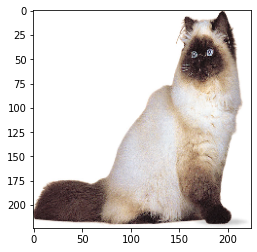

In [10]:
plt.imshow(img)
final_prediction = decode_predictions(preds, top=5) #Can also look at top k results. 
print("The object in the image is: ", final_prediction[0][0][1])
print("with a confidence of ", final_prediction[0][0][2])

In [12]:
final_prediction

[[('n02123597', 'Siamese_cat', 0.9976866),
  ('n02125311', 'cougar', 0.00036550834),
  ('n02444819', 'otter', 0.0002767163),
  ('n02443484', 'black-footed_ferret', 0.00026524943),
  ('n02134084', 'ice_bear', 0.00024518862)]]

Classify ImageNet classes with VGG16

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet')
print(model.summary())


553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [14]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/images/Himalayan-chocolate-point.jpg', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

The object in the image is:  Siamese_cat
with a confidence of  0.99992406


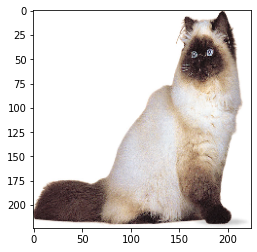

In [15]:
plt.imshow(img)
final_prediction = decode_predictions(preds, top=5) #Can also look at top k results. 
print("The object in the image is: ", final_prediction[0][0][1])
print("with a confidence of ", final_prediction[0][0][2])

In [16]:
final_prediction

[[('n02123597', 'Siamese_cat', 0.99992406),
  ('n02124075', 'Egyptian_cat', 3.6231013e-05),
  ('n02443484', 'black-footed_ferret', 1.4000133e-05),
  ('n02441942', 'weasel', 4.4659205e-06),
  ('n02125311', 'cougar', 3.5243304e-06)]]

--------------------------------------------------------------------

Extract features with VGG16

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)  #Top means the dense layers. Here, we are only importing the convolutional layers. 

img = image.load_img('/content/drive/MyDrive/Colab Notebooks/images/Himalayan-chocolate-point.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [21]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [22]:
features.shape

(1, 7, 7, 512)

-------------------------------------------------------------------------------

Extract features from an arbitrary intermediate layer with VGG16

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv3').output) #Also try block3_conv3, block1_conv2

img = image.load_img('/content/drive/MyDrive/Colab Notebooks/images/Himalayan-chocolate-point.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [31]:
features.shape

(1, 56, 56, 256)

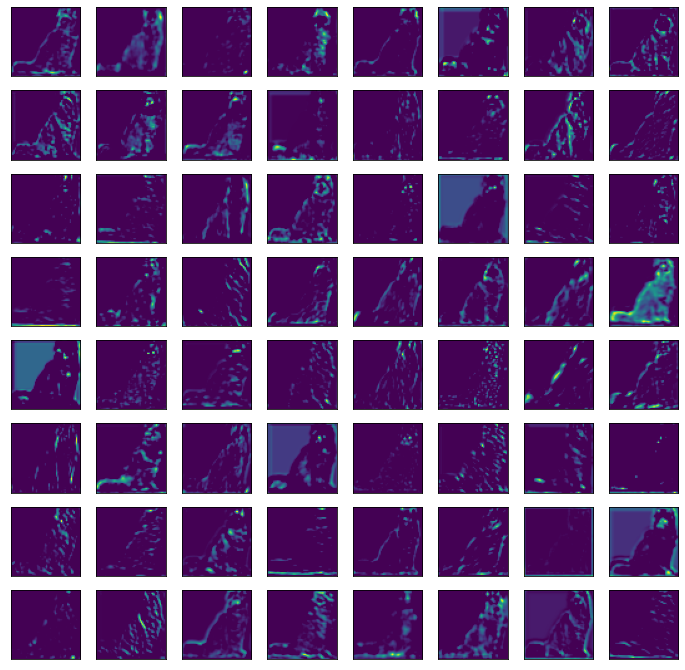

In [32]:
square = 8
ix = 1
plt.figure(figsize=(12, 12))
for _ in range(square):
	for _ in range(square):
   
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(features[0, :, :, ix-1])
		ix += 1
# show the figure
plt.show()

These pre-trained networks can be used as encoders for U-net to speed up training. Also, pre-trained networks can help with achieving better accuracy for smaller training datasets. 